In [2]:
import pandas as pd
import nltk
from nltk import word_tokenize
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from nltk import pos_tag
from nltk import FreqDist
#from keras.model import Sequential
#from keras.layers import Dense
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
from nltk.corpus import stopwords
train_data.replace('',np.NaN)
test_data.replace('',np.NaN)
sw=list(set(stopwords.words('english')))
review_description=train_data['review_description']
variety=train_data['variety']
#label_encoder=LabelEncoder()
#emp_list=[]
required_types=["J"]
words=[]

for i in review_description:
    words_cleaned = re.sub(r'[^(a-zA-Z)\s]','', i)
    tokenized=word_tokenize(words_cleaned)
    stopped=[w for w in tokenized if not w in sw]
    
    pos=nltk.pos_tag(stopped)
    for w in pos:
        if  w[1][0] in required_types:
            words.append(w[0].lower())
            
#To find the most frequent words in the reviews            
words=nltk.FreqDist(words)
Freq_word=list(words.keys())[:1000]

word_Freq=list(words.values())[:1000]
print(Freq_word)
print(word_Freq) 

#for i in X:
#    temp_list.append(' '.join([re.sub('[0-9\W_]', '', word)for word in i.split()
#if not word in s]))
                               

['classic', 'hay', 'decent', 'sweetness', 'short', 'equal', 'blue', 'herb', 'pitfruit', 'hard', 'inky', 'dark', 'aromas', 'black', 'nose', 'ethereal', 'delicate', 'impressive', 'small', 'exotic', 'ripe', 'sweet', 'rich', 'full', 'fresh', 'touch', 'bold', 'interesting', 'red', 'currant', 'extract', 'depth', 'likable', 'unhindered', 'excess', 'enjoyable', 'due', 'new', 'french', 'chocolate', 'broad', 'fleshy', 'abundant', 'ample', 'nice', 'atop', 'tannin', 'additional', 'typical', 'tight', 'neutral', 'sharp', 'sangiovese', 'forest', 'warm', 'palate', 'gamy', 'assertive', 'gritty', 'astringent', 'freshcut', 'light', 'vibrant', 'briny', 'stainless', 'funky', 'harmonious', 'finish', 'future', 'accessible', 'young', 'soft', 'attractive', 'creamy', 'rounded', 'first', 'green', 'lemony', 'freshness', 'easy', 'dry', 'white', 'greenapple', 'balsam', 'deep', 'herbal', 'serious', 'overall', 'solid', 'wine', 'concentrated', 'tropical', 'candied', 'upright', 'underbrush', 'aromatic', 'earthy', 'foll

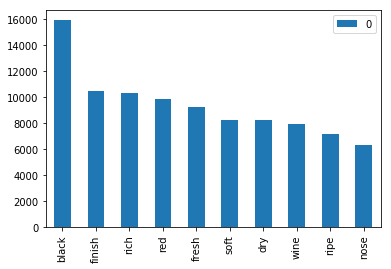

In [4]:
#Plotting the top 10 most frequent words
import operator
sorted_words = dict(sorted(words.items(), key=operator.itemgetter(1),reverse=True))
import itertools
from itertools import islice 
word=dict(itertools.islice(sorted_words.items(), 10))
df = pd.DataFrame.from_dict(word, orient='index')
df.plot(kind='bar')

In [26]:
replacing_list = []

for j in review_description:
    replacing_list.append(' '.join([re.sub('[0-9\W_]', '', word) for word in j.split() if not word in sw]))
review_description = replacing_list
cv=CountVectorizer()
X_clean=cv.fit_transform(review_description)
label_encoder=LabelEncoder()
variety = label_encoder.fit_transform(variety)
X_train, X_test, y_train, y_test = train_test_split(X_clean,variety, train_size=0.8) 


In [27]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
class mycalls(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if(logs.get('accuracy')>0.90):
                print("\nReached 90.0 % accuracy so cancelling training")
                self.model.stop_training=True
callbacks=mycalls()                
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=len(cv.get_feature_names())))
model.add(Dense(variety.max()+1, activation='sigmoid'))
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.fit(X_clean,variety, epochs=4, verbose=1,callbacks=[callbacks])


Epoch 1/4
82657/82657 [==============================] - 173s 2ms/step - loss: 1.1691 - accuracy: 0.6551
Epoch 2/4
82657/82657 [==============================] - 174s 2ms/step - loss: 0.6419 - accuracy: 0.7990
Epoch 3/4
82657/82657 [==============================] - 178s 2ms/step - loss: 0.4522 - accuracy: 0.8576
Epoch 4/4
82657/82657 [==============================] - 171s 2ms/step - loss: 0.3304 - accuracy: 0.8949
